<a href="https://colab.research.google.com/github/Exmachina47/NEURO-RTHYM-ANALYSIS/blob/main/NEURAL_RHTYHM_PATTERNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa
!pip install streamlit
!pip install pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn import datasets
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
import streamlit as st
from pydub import AudioSegment

In [3]:
son_of_man = AudioSegment.from_file('/content/drive/MyDrive/NEURAL MUSIC PROJECT/Son Of Man - Phil Collins (with lyrics) [-udx1ojowws].mp3', format= 'mp3')

son_of_man.export('Son of Man.wav', format = 'wav')


<_io.BufferedRandom name='Son of Man.wav'>

**STEP 1:** LOAD AND VISUALIZE AUDIO

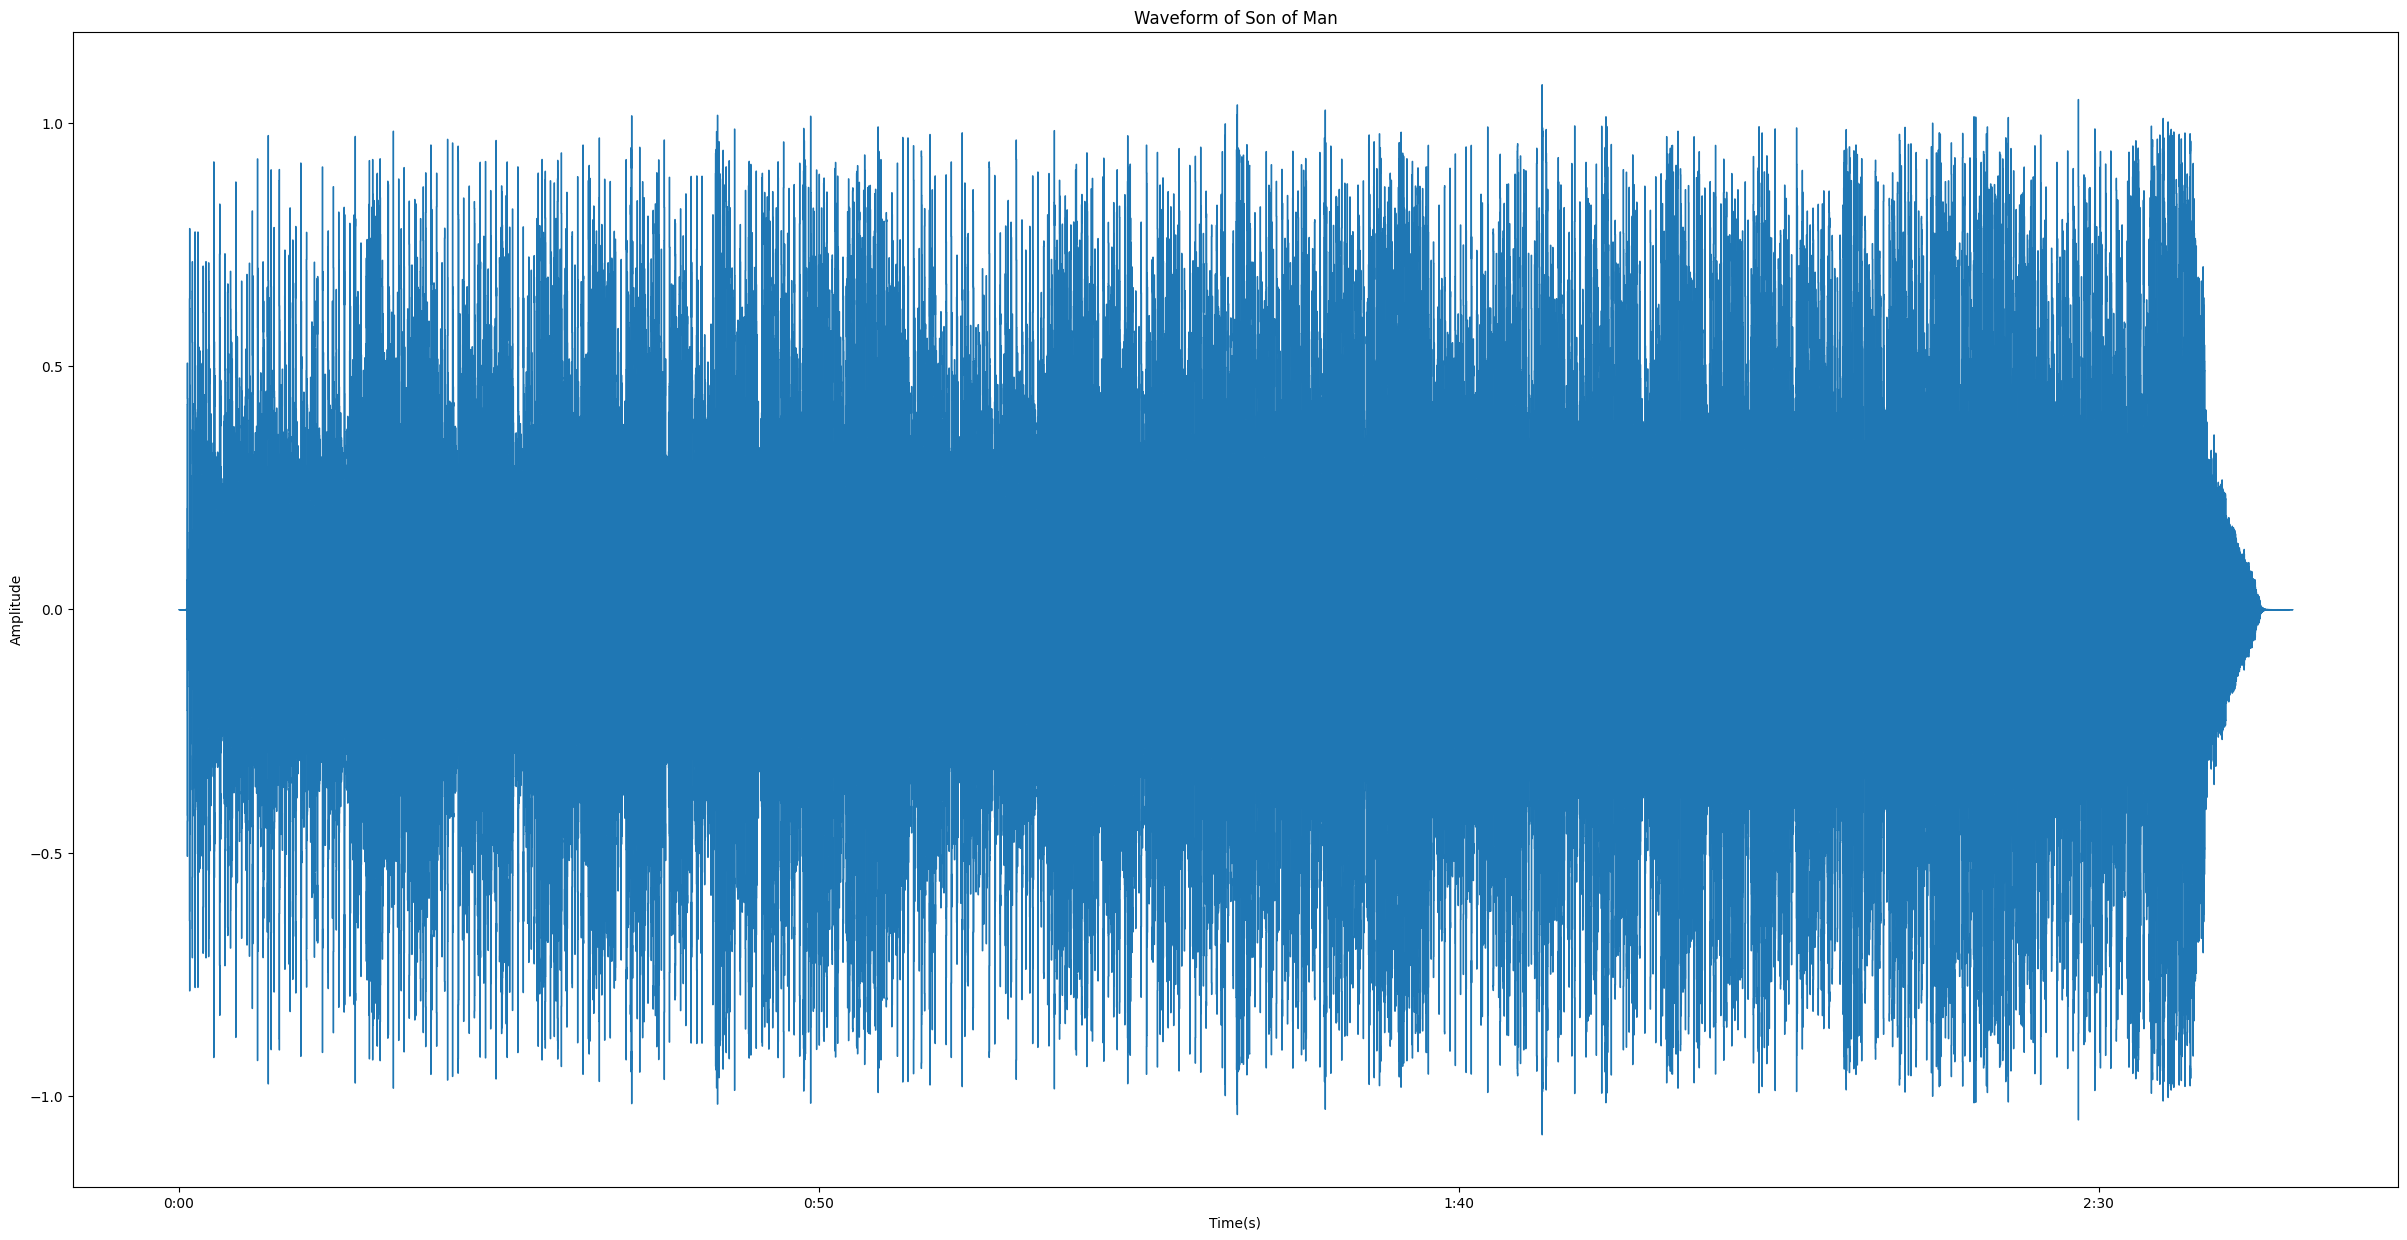

In [4]:
y, sr = librosa.load('Son of Man.wav')


plt.figure(figsize=(30, 15))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Son of Man')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

**STEP 2**: EXTRACT FEATURES

In [5]:
# Here we track the beat and the tempo of the song
tempo, beatframes = librosa.beat.beat_track(y=y, sr=sr)

# MFCC(Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# spectral centroid
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

**STEP 3**: VISUALIZE MFCCs       
It's an optional step but useful.

**NB**: The song is 2minutes and 44 seconds in total (2:44)

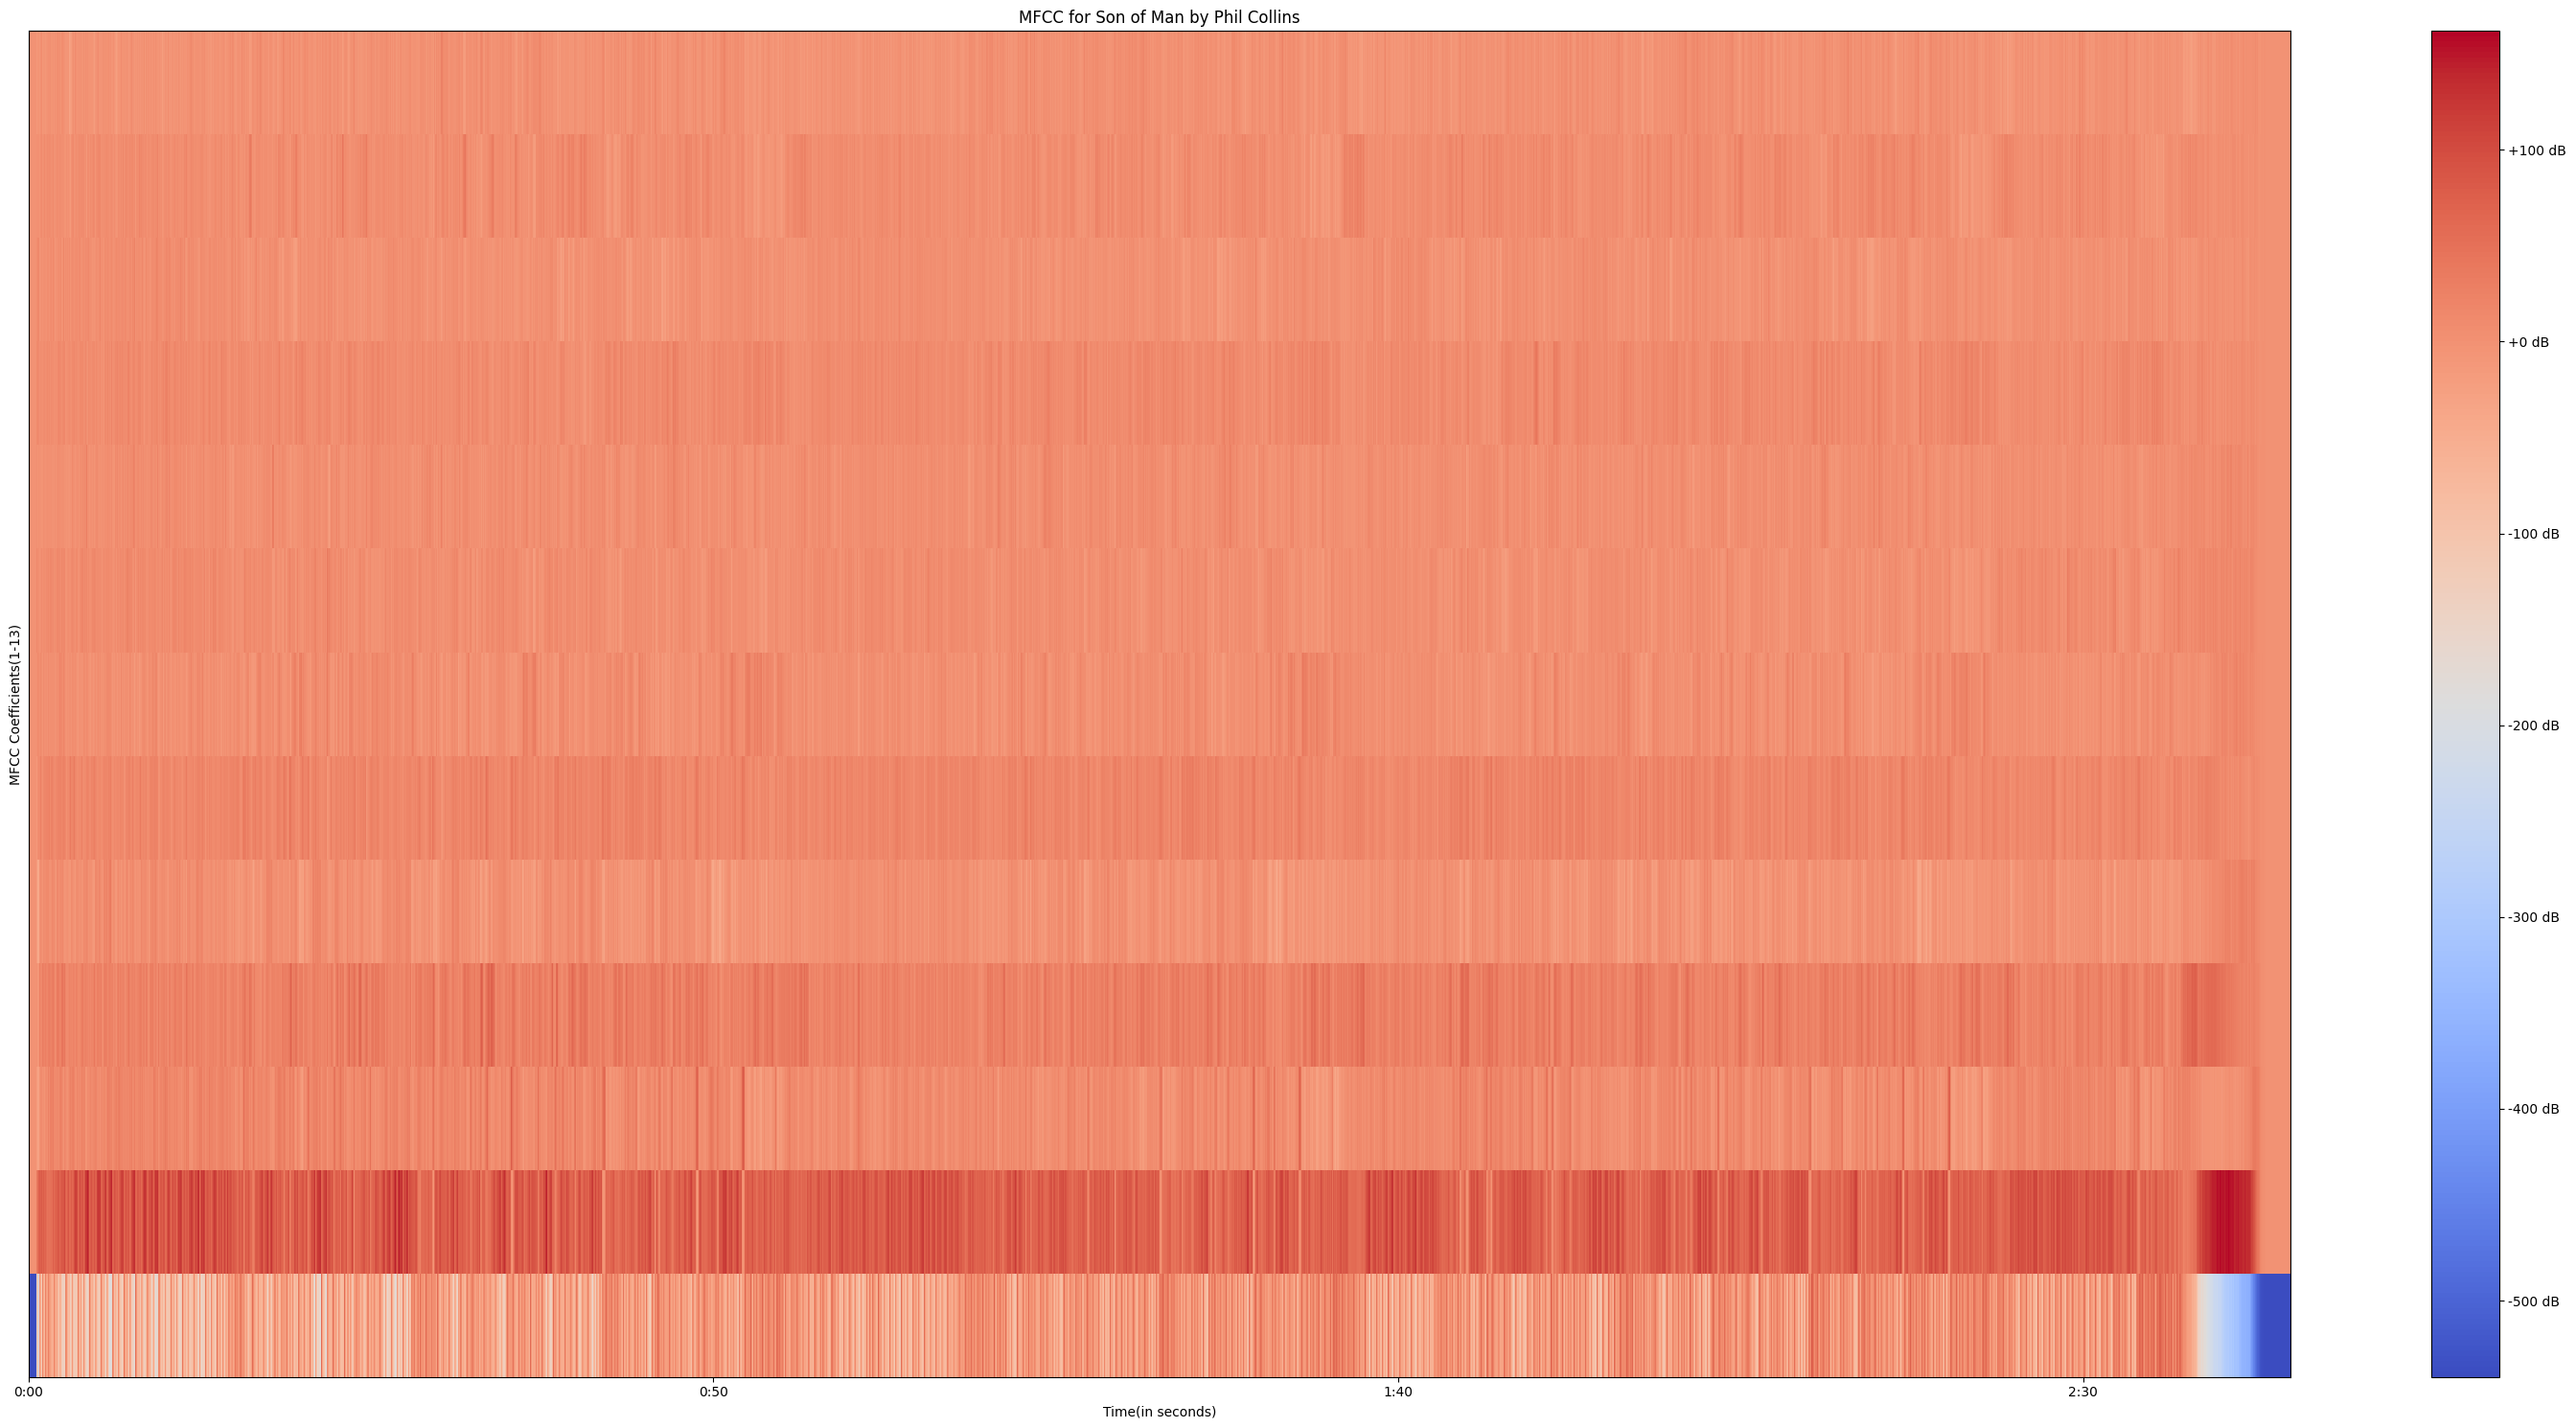

In [6]:
plt.figure(figsize=(30, 15))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Son of Man by Phil Collins')
plt.ylabel('MFCC Coefficients(1-13)')
plt.xlabel('Time(in seconds)')
plt.tight_layout()
plt.show()

In [7]:
mfccs.shape

(13, 7112)

In [8]:
mfccs_df = pd.DataFrame(mfccs.T)
mfccs_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7108,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7109,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7110,-539.78186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
